In [1]:
from __future__ import print_function, division
import scipy
from keras.models import load_model
import matplotlib.pyplot as plt
import sys
import numpy as np
import os
import keras
import pandas as pd

from keras.datasets import mnist
from keras_contrib.layers.normalization.instancenormalization import InstanceNormalization
from keras.layers import Input, Dense, Reshape, Flatten, Dropout, Concatenate
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam
import datetime
import matplotlib.pyplot as plt
import sys
import numpy as np
import os
import cv2

Using TensorFlow backend.


In [2]:
#Root directory of the project
ROOT_DIR = os.path.abspath(".")
MODEL_PATH = os.path.join(ROOT_DIR, "models")
TEST_DATASET_PATH = os.path.join(ROOT_DIR, "dataset")
TEST_DATASET_PATH

'E:\\FastMRI\\MRI-reconstruction\\dataset'

In [3]:
TEST_LOW_DIR = "singlecoil_test_3D_images/"
TEST_IMAGES_DIR_PATH = os.path.join(TEST_DATASET_PATH, TEST_LOW_DIR)
TEST_IMAGES_DIR_PATH

'E:\\FastMRI\\MRI-reconstruction\\dataset\\singlecoil_test_3D_images/'

In [4]:
len(os.listdir(TEST_IMAGES_DIR_PATH))

108

In [5]:
test_images = [os.path.join(TEST_IMAGES_DIR_PATH, x) for x in os.listdir(TEST_IMAGES_DIR_PATH)]
len(test_images)

108

### Load the model

In [6]:
model = load_model(os.path.join(MODEL_PATH, '01/g_AB.h5'), custom_objects={'InstanceNormalization':InstanceNormalization})
print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 320, 320, 3)  0                                            
__________________________________________________________________________________________________
conv2d_11 (Conv2D)              (None, 160, 160, 32) 1568        input_3[0][0]                    
__________________________________________________________________________________________________
leaky_re_lu_9 (LeakyReLU)       (None, 160, 160, 32) 0           conv2d_11[0][0]                  
__________________________________________________________________________________________________
instance_normalization_7 (Insta (None, 160, 160, 32) 2           leaky_re_lu_9[0][0]              
_____________________________________

C:\Users\Aiman\Anaconda3\envs\sticker\lib\site-packages\keras\engine\saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [7]:
fname = test_images[0]
img_3d = np.load(fname)
print(fname)
img_3d.shape

E:\FastMRI\MRI-reconstruction\dataset\singlecoil_test_3D_images/file1000022_v2.npy


(37, 320, 320)

In [8]:
img_3d = np.moveaxis(img_3d, 0, 2)
slices = img_3d.shape[-1]
slices, img_3d.shape

(37, (320, 320, 37))

In [9]:
img = img_3d[:,:,18] 
img.shape

(320, 320)

In [12]:
a = img[:,:,np.newaxis]
a.shape

(320, 320, 1, 1)

In [14]:
import cv2
y = cv2.imread("1_21.jpg")
y.shape

(320, 320, 3)

In [15]:
img = y/127.5 - 1.
img.shape

(320, 320, 3)

In [16]:
def predict(img):
    # Make it 4D for inference
    img_4d = np.expand_dims(img, axis=0)
    print(img_4d.shape)
    # Generate domain B image
    syn_img = model.predict(img_4d)
    # Make it 3D
    img_B = np.squeeze(syn_img, axis=0)
    # Rescale images 0 - 1
    img_B = 0.5 * img_B + 0.5
    return img_B

In [18]:
#plt.imshow(img, cmap='gray')

In [19]:
out_3d = predict(img)
out_3d.shape

(1, 320, 320, 3)


(320, 320, 3)

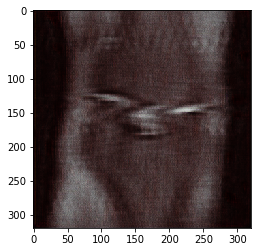

In [20]:
plt.imshow(out_3d, cmap='gray')